<a href="https://colab.research.google.com/github/Fonseca-BrunoC/Processo-batelada---Monod/blob/main/Modelagem%20pronta%20-%20Monod%20batelada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Importando as bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import differential_evolution
from scipy.integrate import odeint
import pandas as pd

In [3]:
class colors:
  BOLD = '\033[1m'
  RESETB = '\033[22m'

In [4]:
#Definindo as EDO's
#Essa função será utilizada tanto para estimar os parâmetros quanto para testa-los
def edo(C, t, *args):  
  mimax = args[0] #unidade 1/hora - taxa específica de crescimento
  Ks = args[1] #constante de semi-saturação
  Yxs = args[2] #coeficiente estequiométrico
  kd = args[3] #constante de morte celular
  alfa = args[4] #constante do produto associado ao crescimento
  beta = args[5] #constante do produto não associado ao crescimento

  mi = mimax * (C[1] / (Ks + C[1])) #Monod
  dCxdt = (mi - kd) * C[0] #eq para célula
  dCsdt = - (1/Yxs) * (mi - kd) * C[0] #eq para o substrato
  dCpdt = ((alfa * mi) + beta ) * C[0] #eq do produto parcialmente associado ao crescimento
  return dCxdt, dCsdt, dCpdt

In [5]:
#Importando os dados
df = pd.read_excel("Dados experimentais Monod.xlsx") 
data = df.to_numpy() #Covertendo os dados em np
t = data[:,0] #tempo
Cexp = data[:,1:4] #Concentrações experimentais
Ci = (Cexp[0,0], Cexp[0,1], Cexp[0,2]) #condições iniciais

In [6]:
#Definindo a função resíduo que será aplicada na evolução diferencial
lista = [1,1,1]
def rmse(parametros, *data):
  t, Cexp = data
  p = tuple(parametros) #Os parâmetros serão os argumentos extras da função EDO e devem estar no formato tuple
  simulaçao = odeint(edo, Ci, t, args = p)
  residuo = simulaçao - Cexp
  for i in range(0,3):
    residuo[:,i] = residuo[:,i] / lista[i]
  residuo = residuo.flatten()
  residuo = sum(residuo ** 2)
  return residuo

In [7]:
limites = [(0, 1),(0, 100),(0, 1),(0, 1),(0, 1),(0, 1)] #limites para cada um dos parâmetros 
args = (t, Cexp)
novos_parametros = differential_evolution(rmse, limites, args = args) #aplicando a evolução diferencial
P = novos_parametros.x
a = novos_parametros.fun
print(a)

6.618037293458223e-13


In [8]:
#Usando novamente odeint para testar os parâmetros obtidos
P = tuple(P)
sol = odeint(edo, Ci, t, args = P)
Cx = sol[:,0]
Cs = sol[:,1]
Cp = sol[:,2]

In [9]:
#Comparando os valores
Cxe = Cexp[:,0]
Cse = Cexp[:,1]
Cpe = Cexp[:,2]

c = 10
nl = []
for i in range(0,200):
  a = round(Cx[i], c)
  b = round(Cxe[i], c)
  if a != b:
    nl.append(c)
    c = c - 1

mini = min(nl)
cd = min(nl) - 1

mimax = 0.037688442173953285 ;
Ks =  1.5000000231153905 ;
Yxs =  0.4999999999481478 ;
kd =  0.003768844149897921 ;
alfa =  0.4999999996382949 ;
beta = 0.015075376922669137
Os dados experimentais são iguais ao modelo em até 5 casas decimais


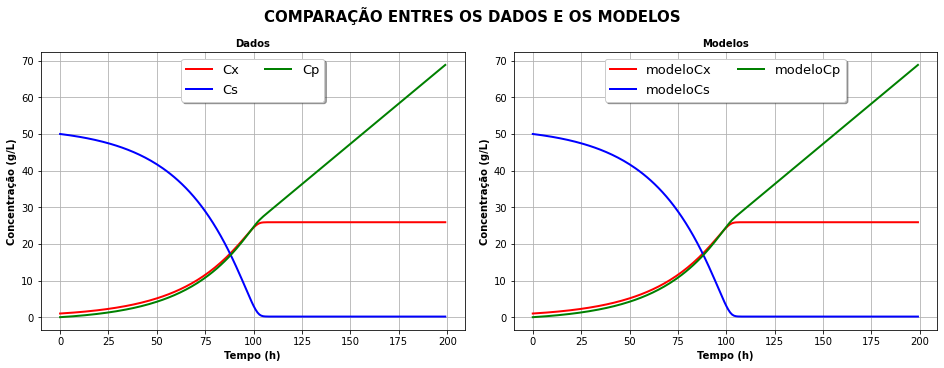

In [12]:
#Apresentando os resultados
print(colors.BOLD + 'mimax =' + colors.RESETB, P[0], colors.BOLD + ';\nKs = '+ colors.RESETB, P[1], colors.BOLD + ';\nYxs = '+ colors.RESETB, P[2], colors.BOLD +';\nkd = '+ colors.RESETB, P[3], colors.BOLD +';\nalfa = '+ colors.RESETB, P[4],colors.BOLD +';\nbeta ='+ colors.RESETB, P[5])
print(colors.BOLD +'Os dados experimentais são iguais ao modelo em até', cd, 'casas decimais' + colors.RESETB)
fig, (ax1, ax2) = plt.subplots(ncols=2, constrained_layout = True)
_ = fig.suptitle("COMPARAÇÃO ENTRES OS DADOS E OS MODELOS", weight ='bold', size = 15)
plt.rc('axes', titlesize=10)     
plt.rc('axes', labelsize=10)   
func = ax1.plot(t, Cxe, 'r-', linewidth = 2, label = 'Cx'), ax2.plot(t, Cx, 'r-', linewidth = 2, label = 'modeloCx')
func2 = ax1.plot(t, Cse, 'b-', linewidth = 2, label = 'Cs'), ax2.plot(t, Cs, 'b-', linewidth = 2, label = 'modeloCs')
func3 = ax1.plot(t, Cpe, 'g-', linewidth = 2, label = 'Cp'), ax2.plot(t, Cp, 'g-', linewidth = 2, label = 'modeloCp')
ax1.set_title("Dados", weight ='bold') 
ax1.set_xlabel('Tempo (h)',weight='bold')               
ax1.set_ylabel('Concentração (g/L)', weight='bold')
ax1.grid(True)
ax2.set_title("Modelos", weight ='bold')    
ax2.set_xlabel('Tempo (h)',weight='bold')               
ax2.set_ylabel('Concentração (g/L)', weight='bold')
ax2.grid(True)
plt.rc('legend', fontsize=13) 
ax1.legend(loc='upper center',ncol=2, shadow=True)
ax2.legend(loc='upper center',ncol=2, shadow=True)
fig.set_figheight(5)                                                 
fig.set_figwidth(13)          
plt.show()